### Importing necessary libraries for this case study

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')


In [27]:
#read and load the loan CSV file
df_Loan=pd.read_csv('loan.csv', engine="python")

# 1) Data understanding and Data Cleaning
***
> ### 1.1) Extract and look into information and headers of CSV

In [28]:
print(f"total number of data and columns present as (rows, columns): {df_Loan.shape}\n")
print("Header information is below")
df_Loan.head()

total number of data and columns present as (rows, columns): (39717, 111)

Header information is below


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [29]:
#last rows inromation
print("Tail/Footer information is below")
df_Loan.tail()

Tail/Footer information is below


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#viewing data from loan status perspective.
total_rows=len(df_Loan)
df_Loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

##### Dropping the rows for loan_status='Current' as the loan currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future.


In [31]:
df_Loan= df_Loan[df_Loan['loan_status']!='Current']
print("Total number of rows now:",len(df_Loan)) ## Total no of rows now.

Total number of rows now: 38577


In [32]:
rows_deleted=((total_rows- len(df_Loan))*100)/total_rows
print("% of rows deleted:",round(rows_deleted,2))

% of rows deleted: 2.87


In [35]:
# Check if there is any duplicate rows.
duplicate_rows = len(df_Loan[df_Loan.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


> ### 1.2) Delete the Uneccessasry Columns.

In [36]:
df_Loan.shape # to get the shape of data

(38577, 111)

In [37]:
(df_Loan.isnull().sum()*100)/len(df_Loan)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

 ##### We can see there are many columns which is having all the value as null/blanks and not doesn participate in analysis.#Hence removing them

In [39]:
print("Total columns with values NA: ", len(df_Loan.columns[df_Loan.isna().all()].tolist()))
na_columns=list(df_Loan.columns[df_Loan.isna().all()])
print("list of Not Available Columns:")
na_columns

Total columns with values NA:  55
list of Not Available Columns:


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [40]:
# Deleting the columns which is having all rows values as na.
df_Loan = df_Loan.dropna(axis=1, how="all")
df_Loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [41]:
# Deleting the rows which is having all columns values as na.
df_Loan = df_Loan.dropna(axis=0, how="all")
df_Loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [43]:
# Lets delete all the columns whose value is unique in nature.

unique_columns = [col for col in df_Loan.columns if df_Loan[col].nunique() == len(df_Loan)]
unique_columns

['id', 'member_id', 'url']

#### We will delete 'member_id', and 'url' as its not much useful in EDA , we will keep the id column which will be used for creating piviot table

In [ ]:
df_Loan.drop(['url','member_id'],axis=1, inplace=True)

In [46]:
df_Loan.shape

(38577, 54)

#### Lets delete the column which is having text/description values as they don't contribute to EDA.

In [47]:
df_Loan.drop(columns=['desc','title'],inplace=True)
df_Loan.shape

(38577, 52)

In [48]:
# We will limit our analysis till Group level only. Hence deleting the subgroups.
df_Loan = df_Loan.drop(['sub_grade'],  axis=1)

#### Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.

In [49]:

behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

df_Loan=df_Loan.drop(behavioural_cols,axis=1)

In [50]:
df_Loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [51]:
# most of the columns values is 1.Deletting them as well.
for column in df_Loan.columns:
    if df_Loan[column].nunique(dropna=True) == 1:
        print(column)
        df_Loan = df_Loan.drop(column, axis=1)
print("-------------")
df_Loan

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
-------------


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [52]:
#Dropping the columns which is having more than 50% of value is null.
total_rows = len(df_Loan)
for column in df_Loan.columns:
    if df_Loan[column].isna().mean().round(2) >= 0.50:
        print(column)
        df_Loan = df_Loan.drop(column, axis=1)
df_Loan.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [53]:
#Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
df_Loan=df_Loan.drop(['emp_title'], axis=1)

## ##  2. Data Conversion

In [54]:
df_Loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [55]:
df_Loan['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [56]:
# Convert term from string to int.
def clean_term(term):
    return int(term.strip().split()[0])

df_Loan['term'] = df_Loan['term'].apply(clean_term) ## removing the string parts of int value
df_Loan['term'].dtype

dtype('int64')

In [57]:
df_Loan['term'].value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [58]:

df_Loan['int_rate'].value_counts()


int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [59]:
# Convert int_rate from percentage to float.
df_Loan['int_rate']=df_Loan['int_rate'].str.strip('%').astype(float)

In [60]:
df_Loan['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [61]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
df_Loan = df_Loan.astype({'loan_amnt':'float','funded_amnt':'float'})
df_Loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000.0,5000.0,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500.0,2500.0,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400.0,2400.0,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000.0,10000.0,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000.0,5000.0,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500.0,2500.0,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500.0,8500.0,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000.0,5000.0,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000.0,5000.0,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [63]:
# check grade type.
df_Loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [64]:
df_Loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [65]:
# Rounding off the belows to two decimals points.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    df_Loan[c] = df_Loan[c].apply(lambda x: round(x,2))
    print(df_Loan[c])


0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [66]:
#converting issue_d to date type
df_Loan['issue_d'] = pd.to_datetime(df_Loan.issue_d, format='%b-%y')
df_Loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [67]:
(df_Loan.isnull().sum()*100)/len(df_Loan)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

## 3. Dropping/ Imputing the rows.


In [68]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(df_Loan)
prev_rows

38577

In [69]:
df_Loan= df_Loan[df_Loan['emp_length'].notna()]
df_Loan= df_Loan[df_Loan['pub_rec_bankruptcies'].notna()]

In [70]:
after_rows=len(df_Loan)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(df_Loan.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [71]:
(df_Loan.isnull().sum()*100)/len(df_Loan)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

#### Hence no NA values present now

In [74]:
#formatting emp_length for later analysis ( converting from string to int data type)
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

df_Loan['emp_length']=df_Loan['emp_length'].apply(lambda x : strip_emp_length(x) )
print(df_Loan['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


## 4. Derived Columns

In [75]:
# Creating a dervied columns for issue month and issue year from issues date
df_Loan['issue_year']=pd.DatetimeIndex(df_Loan['issue_d']).year
df_Loan['issue_month']=pd.DatetimeIndex(df_Loan['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


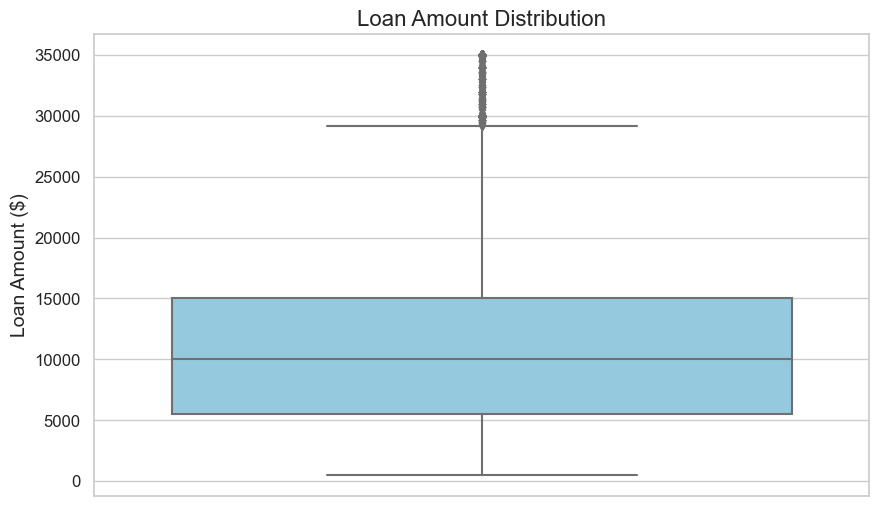

In [78]:
print(df_Loan.shape)
print(df_Loan["loan_amnt"].describe())
sns.set(style="whitegrid")

# Create the box plot
plot.figure(figsize=(10, 6))
sns.boxplot(y=df_Loan["loan_amnt"], color="skyblue")

# Customize the plot
plot.title('Loan Amount Distribution', fontsize=16)
plot.ylabel('Loan Amount ($)', fontsize=14)
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)

# Show the plot
plot.show()

## 5. Univariate Analysis

In [79]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

>### Bucketing different variables for better analysis

In [80]:
# Bucketing Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

df_Loan['loan_amnt_b'] = df_Loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [81]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

df_Loan['annual_inc_b'] = df_Loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [82]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df_Loan['int_rate_b'] = df_Loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [83]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df_Loan['dti_b'] = df_Loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

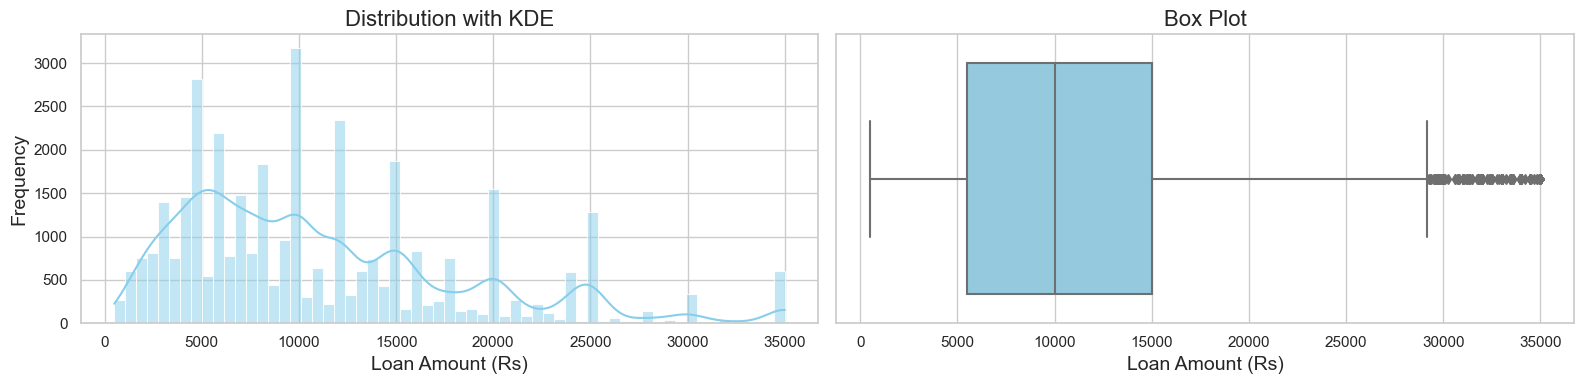

In [88]:
column_titles = {
    'loan_amnt': 'Loan Amount (Rs)'
    # Add other column titles if needed
}

def plot_digram(df, column):
    fig, p = plot.subplots(1, 2, figsize=(16, 4))
    
    # Plot histogram with KDE
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0], color="skyblue")
    
    # Plot boxplot
    sns.boxplot(x=column, data=df, ax=p[1], color="skyblue")
    
    # Set labels
    p[0].set_xlabel(column_titles.get(column, column), fontsize=14)
    p[0].set_ylabel('Frequency', fontsize=14)
    p[1].set_xlabel(column_titles.get(column, column), fontsize=14)
    
    # Set titles
    p[0].set_title('Distribution with KDE', fontsize=16)
    p[1].set_title('Box Plot', fontsize=16)
    
    # Adjust layout for better spacing
    plot.tight_layout()
    plot.show()
/
# Usage
plot_digram(df_Loan, 'loan_amnt')

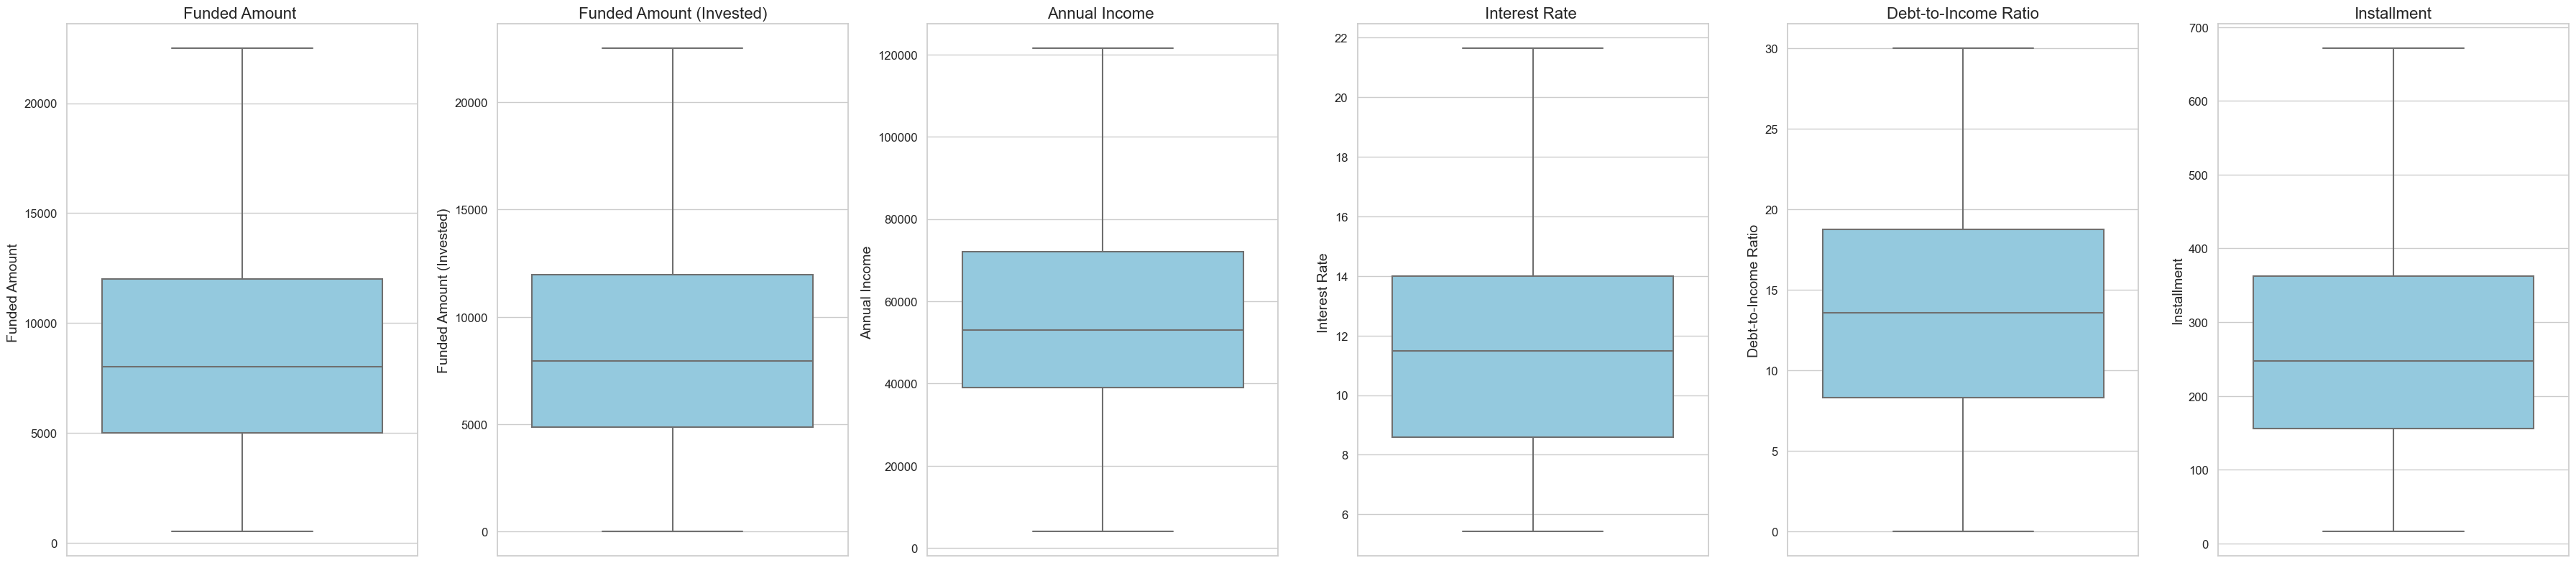

In [115]:
# Assuming column_titles is a dictionary containing titles for the columns
column_titles = {
    'loan_amnt': 'Loan Amount ',
    'funded_amnt': 'Funded Amount ',
    'funded_amnt_inv': 'Funded Amount (Invested)',
    'annual_inc': 'Annual Income ',
    'int_rate': 'Interest Rate ',
    'dti': 'Debt-to-Income Ratio',
    'installment': 'Installment'
}

def plot_multiple_boxplots(df, columns):
    num_columns = len(columns)
    fig, axes = plot.subplots(1, num_columns, figsize=(6*num_columns, 8))
    
    for i, column in enumerate(columns):
        sns.boxplot(y=df[column], ax=axes[i], color="skyblue")
        axes[i].set_title(column_titles.get(column, column), fontsize=16)
        axes[i].set_xlabel('')
        axes[i].set_ylabel(column_titles.get(column, column), fontsize=14)
        axes[i].tick_params(axis='y', labelsize=12)
    
    plot.tight_layout()
    plot.show()

# Columns to plot
columns_to_plot = [
    'funded_amnt', 
    'funded_amnt_inv', 
    'annual_inc', 
    'int_rate', 
    'dti', 
    'installment'
]

# Usage
plot_multiple_boxplots(df_Loan, columns_to_plot)


#### From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
#### Lets remove the outlier

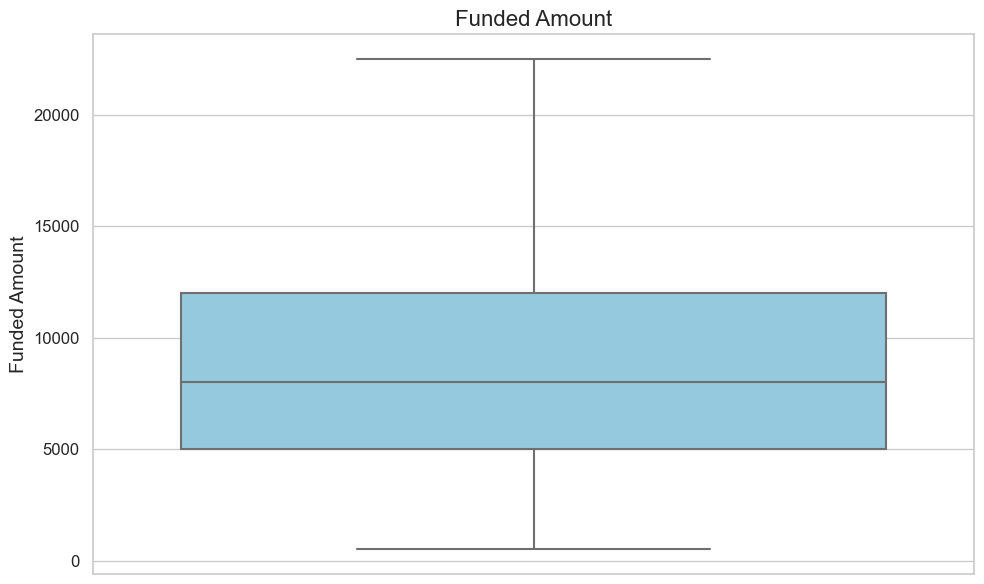

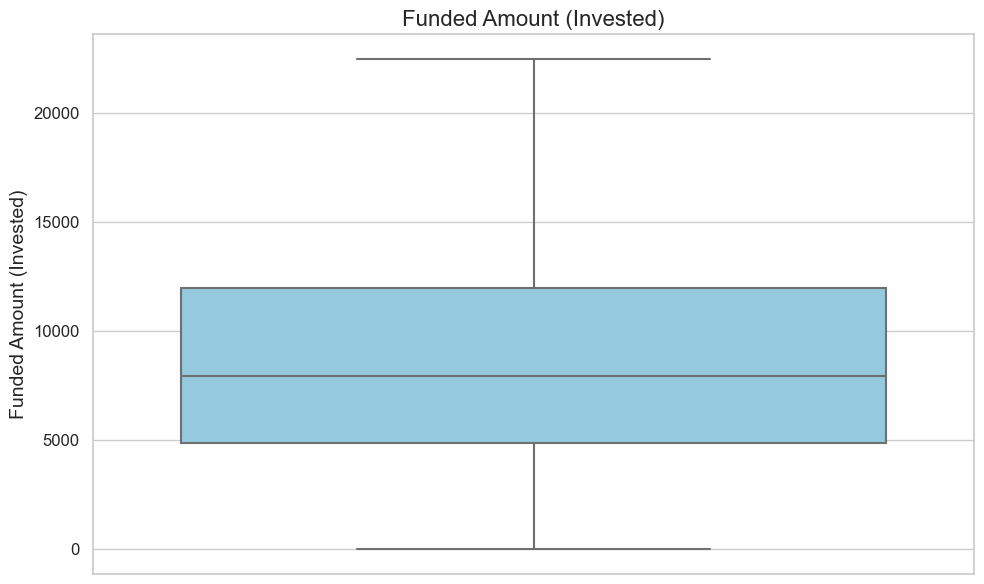

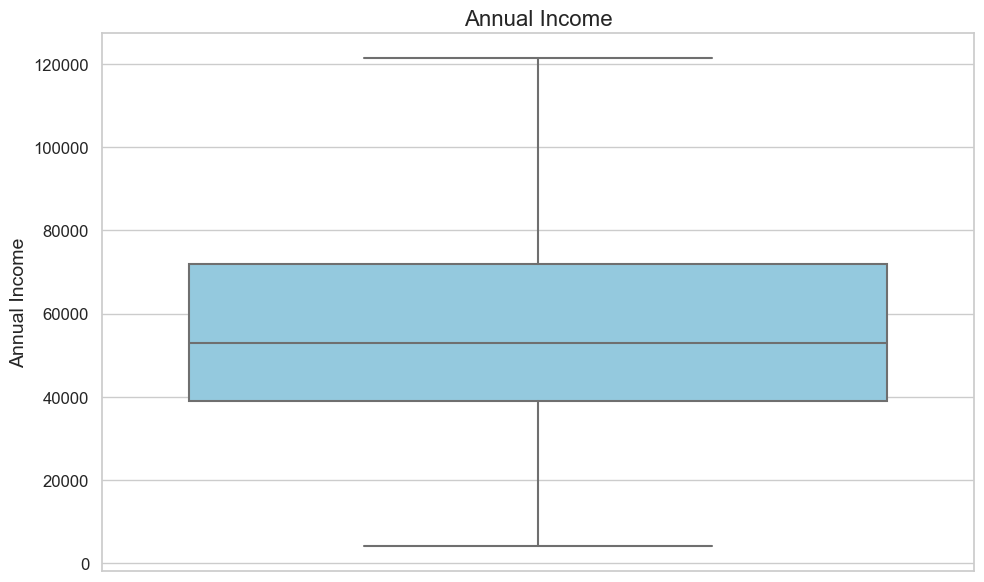

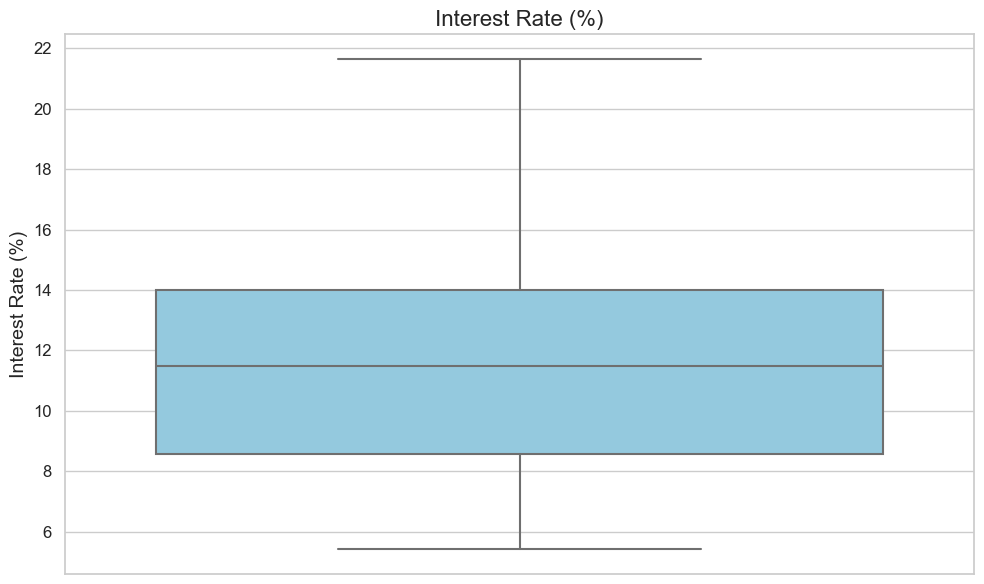

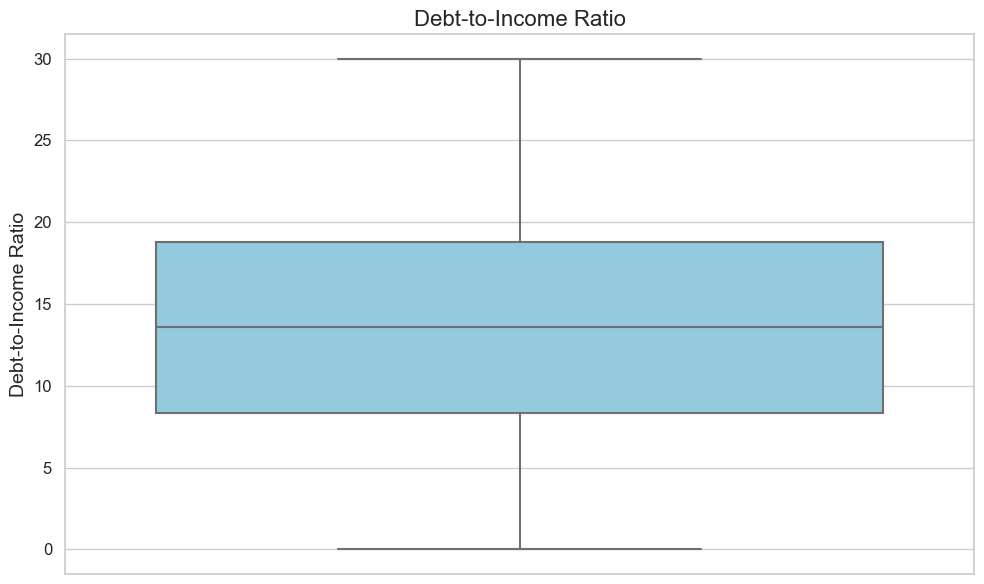

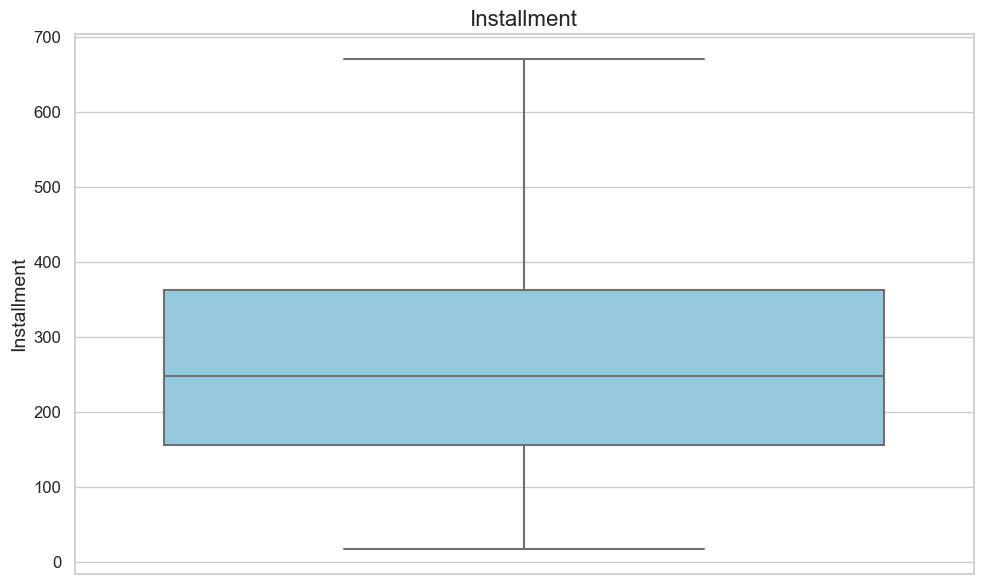

In [114]:

# Assuming column_titles is a dictionary containing titles for the columns
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount (Invested)',
    'annual_inc': 'Annual Income',
    'int_rate': 'Interest Rate (%)',
    'dti': 'Debt-to-Income Ratio',
    'installment': 'Installment'
    # Add other column titles if needed
}

# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns, threshold=1.5):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
outliers_columns_set1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2 = ['int_rate', 'installment', 'annual_inc']

df_Loan = remove_outliers_iqr(df_Loan, outliers_columns_set1, 1.5)
df_Loan = remove_outliers_iqr(df_Loan, outliers_columns_set2, 1.5)

# Function to plot each box plot one after another
def plot_boxplot(df, column):
    plot.figure(figsize=(10, 6))
    sns.boxplot(y=df[column], color="skyblue")
    plot.title(column_titles.get(column, column), fontsize=16)
    plot.xlabel('')
    plot.ylabel(column_titles.get(column, column), fontsize=14)
    plot.tick_params(axis='y', labelsize=12)
    plot.tight_layout()
    plot.show()

# Columns to plot
columns_to_plot = [
    'funded_amnt', 
    'funded_amnt_inv', 
    'annual_inc', 
    'int_rate', 
    'dti', 
    'installment'
]

# Plot each box plot one after another
for column in columns_to_plot:
    plot_boxplot(df_Loan, column)


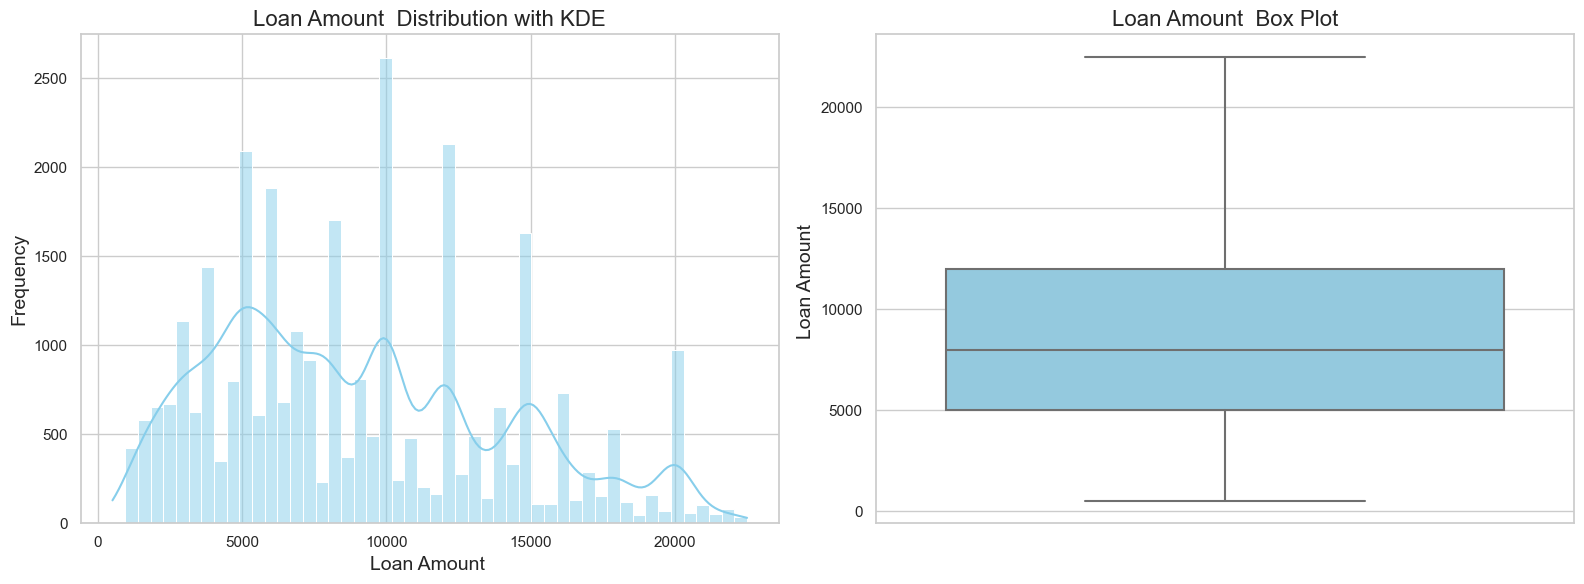

count    30671.000000
mean      9044.558378
std       5004.745504
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      22500.000000
Name: loan_amnt, dtype: float64


In [110]:
column_titles = {
    'loan_amnt': 'Loan Amount ',
    'funded_amnt': 'Funded Amount ',
    'funded_amnt_inv': 'Funded Amount (Invested) ',
    'annual_inc': 'Annual Income ',
    'int_rate': 'Interest Rate (%)',
    'dti': 'Debt-to-Income Ratio',
    'installment': 'Installment '
    # Add other column titles if needed
}

# Function to remove outliers based on IQR
def remove_outliers_iqr(data, columns, threshold=1.5):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
outliers_columns_set1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2 = ['int_rate', 'installment', 'annual_inc']

df_Loan = remove_outliers_iqr(df_Loan, outliers_columns_set1, 1.5)
df_Loan = remove_outliers_iqr(df_Loan, outliers_columns_set2, 1.5)

# Function to plot a histogram with KDE and a box plot for a given column
def plot_digram(df, column):
    fig, axes = plot.subplots(1, 2, figsize=(16, 6))
    
    # Plot histogram with KDE
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'{column_titles.get(column, column)} Distribution with KDE', fontsize=16)
    axes[0].set_xlabel(column_titles.get(column, column), fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)
    
    # Plot boxplot
    sns.boxplot(y=df[column], ax=axes[1], color="skyblue")
    axes[1].set_title(f'{column_titles.get(column, column)} Box Plot', fontsize=16)
    axes[1].set_xlabel('')
    axes[1].set_ylabel(column_titles.get(column, column), fontsize=14)
    
    plot.tight_layout()
    plot.show()

# Usage
plot_digram(df_Loan, 'loan_amnt')

# Print and format the description of the Loan Amount
description = df_Loan['loan_amnt'].describe()
print(description)


### Observation:
##### Most of the loan amount applied was in the range of 5k-14k.
##### Max Loan amount applied was ~27k.

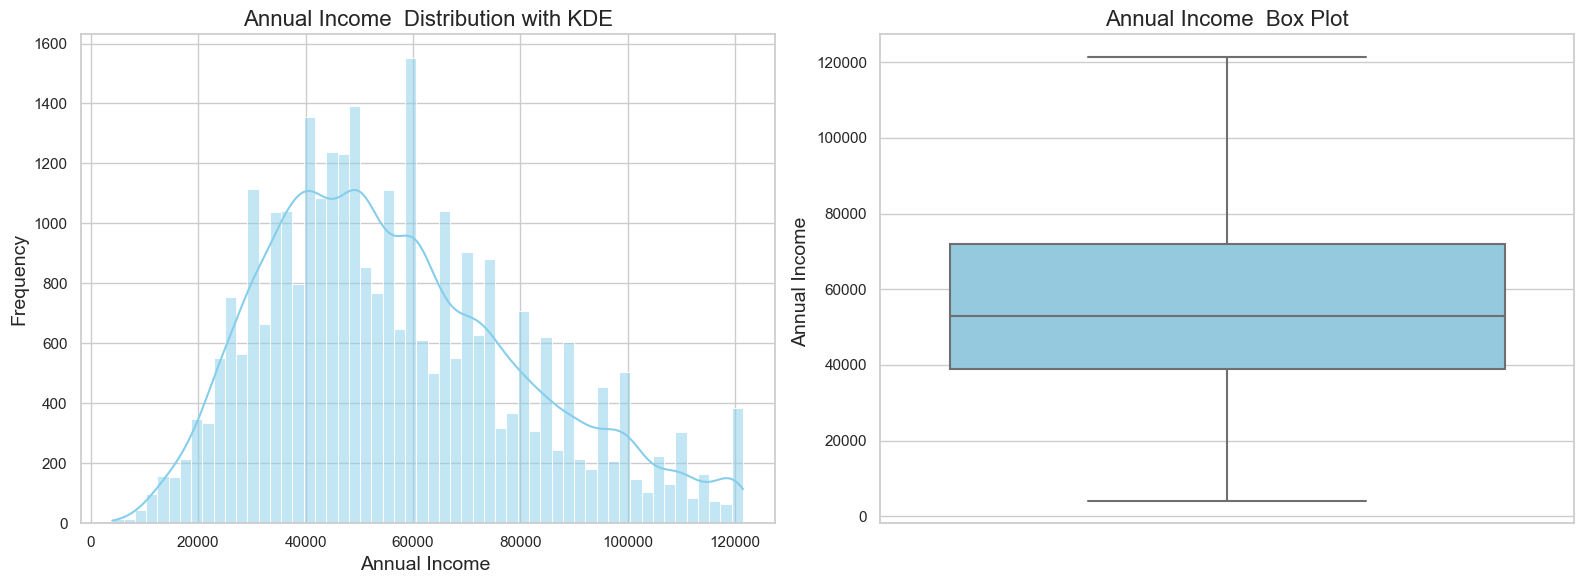

count     30671.000000
mean      56858.357881
std       24146.342684
min        4000.000000
25%       39000.000000
50%       53000.000000
75%       72000.000000
max      121500.000000
Name: annual_inc, dtype: float64

In [112]:
plot_digram(df_Loan, 'annual_inc')
# describe the annual income details
df_Loan['annual_inc'].describe()

In [103]:
print("Average Anual Income is :", round(df_Loan['annual_inc'].mean(),0))

Average Anual Income is : 56858.0


#### The Annual income of most if applicants lies between 40k-75k.

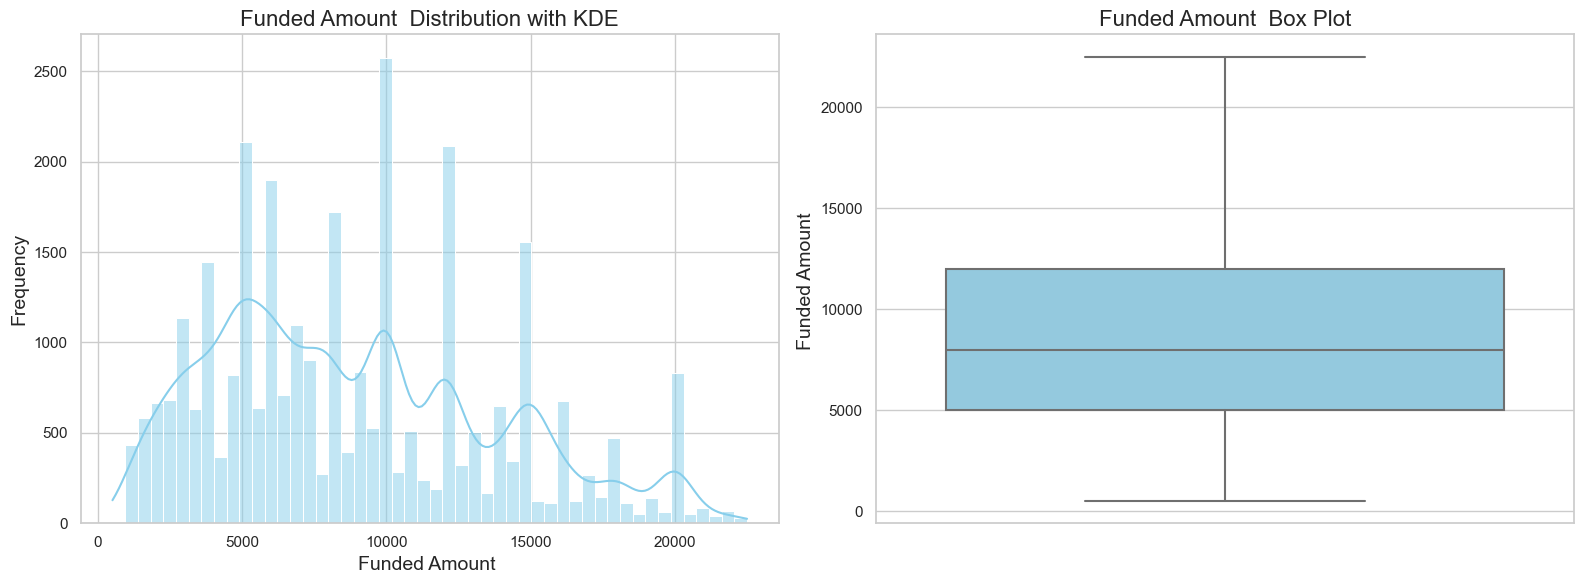

count    30671.000000
mean      8898.914284
std       4886.496077
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      22500.000000
Name: funded_amnt, dtype: float64

In [113]:
plot_digram(df_Loan, 'funded_amnt')
df_Loan['funded_amnt'].describe()

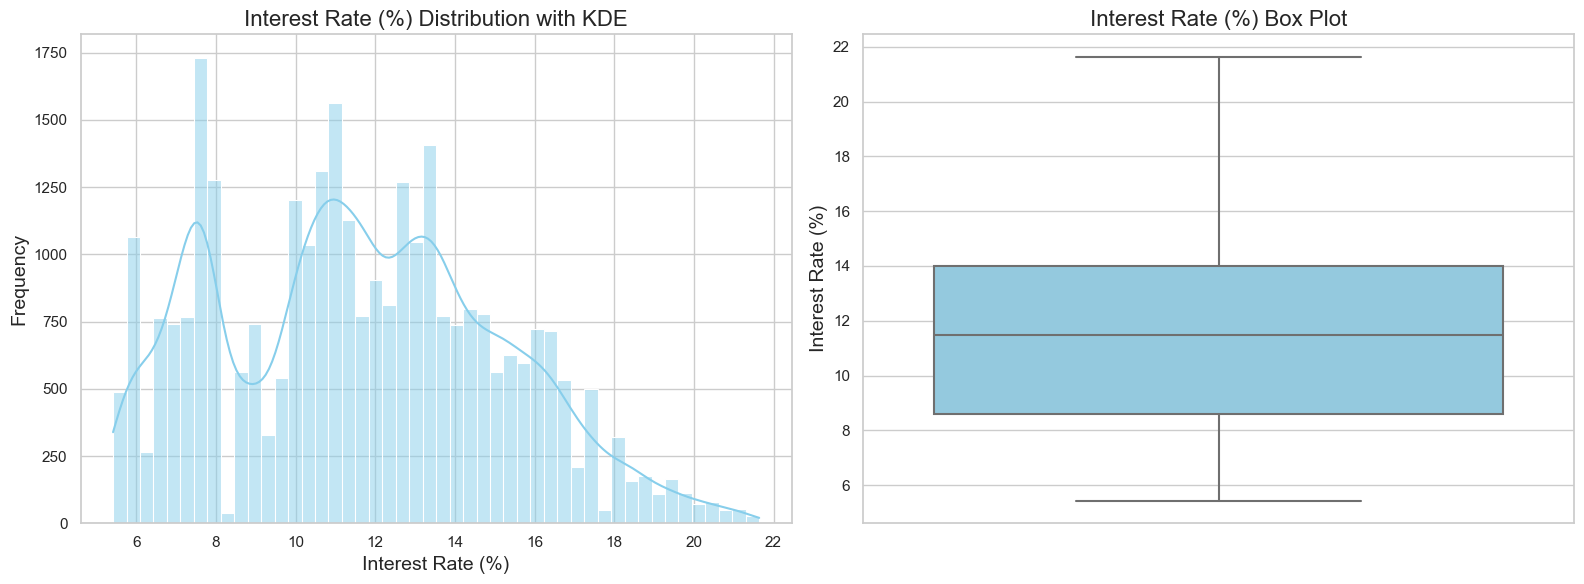

count    30671.000000
mean        11.622904
std          3.514825
min          5.420000
25%          8.590000
50%         11.490000
75%         13.990000
max         21.640000
Name: int_rate, dtype: float64

In [105]:
plot_digram(df_Loan, 'int_rate')
df_Loan['int_rate'].describe()

#### Most of the applicant's rate of intrest is between in the range of 8%-14%.
#### Average Rate of intrest of rate is 11.7 %

>### 5.2 Unordered Categorical Variable Analysis

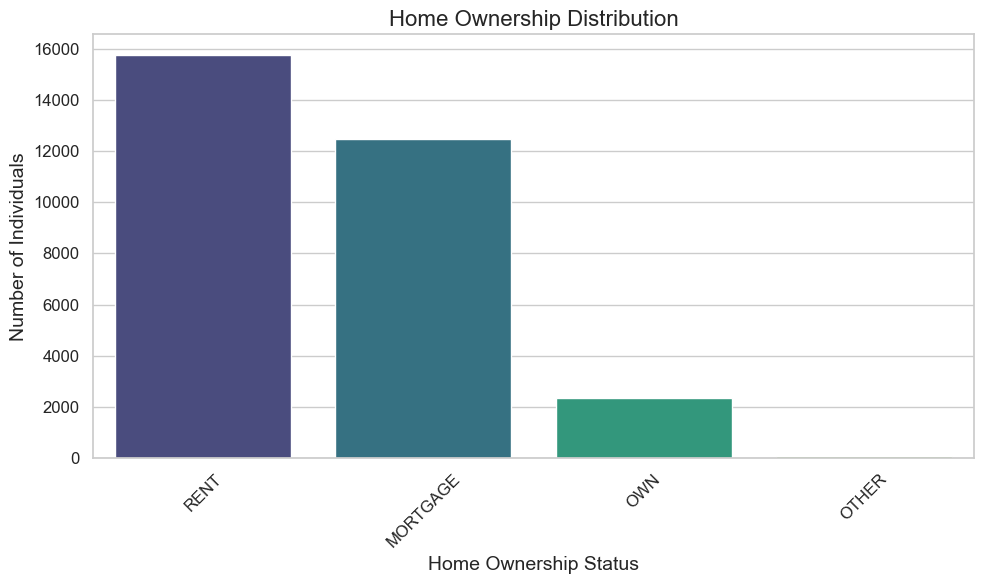

In [106]:
def plot_home_ownership_bar(df, column):
    plot.figure(figsize=(10, 6))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, palette="viridis")
    plot.title('Home Ownership Distribution', fontsize=16)
    plot.xlabel('Home Ownership Status', fontsize=14)
    plot.ylabel('Number of Individuals', fontsize=14)
    plot.xticks(rotation=45, fontsize=12)
    plot.yticks(fontsize=12)
    plot.tight_layout()
    plot.show()

# Usage
plot_home_ownership_bar(df_Loan, 'home_ownership')

## Majority of loan applicants are either living on Rent or on Mortgage

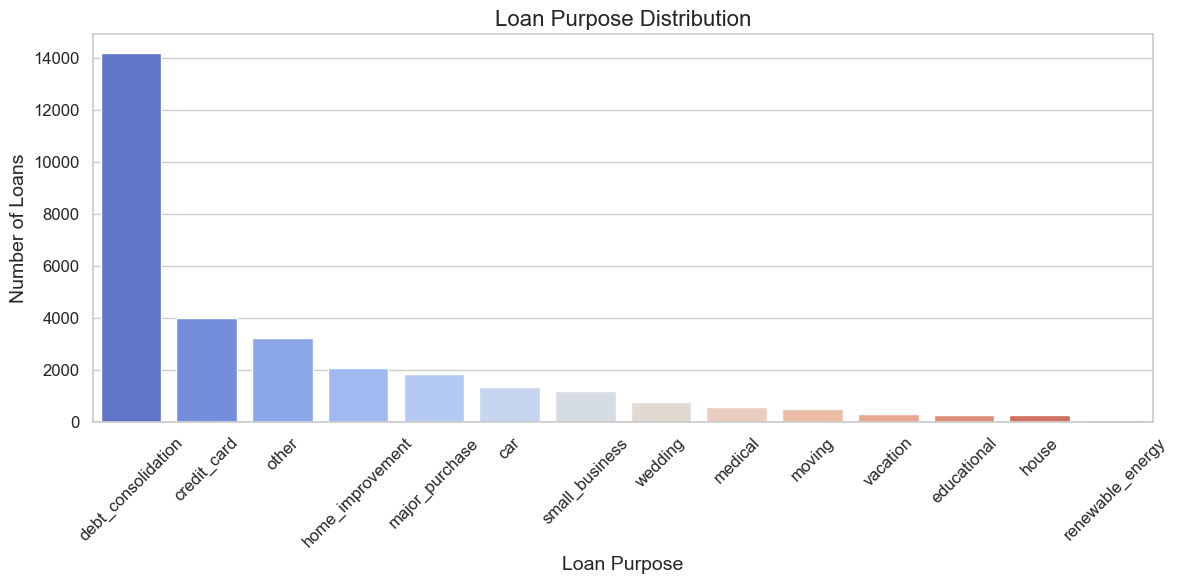

In [107]:
def plot_purpose_bar(df, column):
    plot.figure(figsize=(12, 6))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, palette="coolwarm")
    plot.title('Loan Purpose Distribution', fontsize=16)
    plot.xlabel('Loan Purpose', fontsize=14)
    plot.ylabel('Number of Loans', fontsize=14)
    plot.xticks(rotation=45, fontsize=12)
    plot.yticks(fontsize=12)
    plot.tight_layout()
    plot.show()

# Usage
plot_purpose_bar(df_Loan, 'purpose')

## Most of the loan applicants are for debt_consolidations.

In [108]:
Failed_per_houseowner_ship=df_Loan
Failed_per_houseowner_ship["loan_status"].value_counts()

loan_status
Fully Paid     26402
Charged Off     4269
Name: count, dtype: int64

<Axes: ylabel='count'>

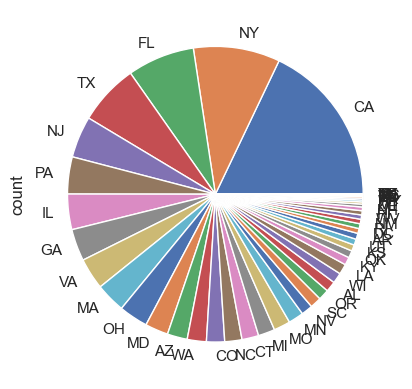

In [116]:
#using Pie plot to visualize
df_Loan['addr_state'].value_counts().plot(kind="pie")

### Most of the Loan applicants are from CA(State).